## Explore SST Trends

- compare CoRTAD data (T data in UI SST dataset) with ECCO2 SST and ERA5 SST data
- compare period 2002-2021

In [56]:
# import packages
import xarray as xr
import matplotlib.pyplot as plt
import glob
import os
import my_functions
import datetime as dt
%matplotlib inline

In [19]:
## import data
os.chdir("/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/Data.nosync/")
ECCO2_SST = xr.open_dataset('ECCO2_SST_weekly.nc')
UI_SST = xr.open_dataset('UI_SST.nc')

In [38]:
ECCO2_SST = my_functions.add_week_and_month(ECCO2_SST)
ECCO2_SST = my_functions.calc_meridional_mean(ECCO2_SST, variable = 'SST', lon = 345)
UI_SST = my_functions.calc_meridional_mean(UI_SST, variable = 'Toff15W', lon = -15)

In [37]:
UI_SST

<xarray.Dataset> Size: 272MB
Dimensions:  (lon: 33, time: 2080, lat: 165)
Coordinates:
  * lon      (lon) float64 264B -15.02 -10.0 -9.77 ... -8.228 -8.145 -8.02
  * time     (time) datetime64[ns] 17kB 1982-01-05 1982-01-12 ... 2021-11-09
  * lat      (lat) float64 1kB 37.01 37.05 37.1 37.14 ... 43.72 43.76 43.8 43.84
Data variables:
    UI       (time, lon, lat) float64 91MB ...
    Tmid     (time, lon, lat) float64 91MB ...
    Toff15W  (time, lon, lat) float64 91MB ...
    UI_mean  (time) float64 17kB -0.5997 -0.8697 -0.1038 ... -2.758 -2.681
Attributes: (12/20)
    Conventions:       CF-1.0
    title:             Data
    source:            CoastNet
    institution:       MARE-UL and Greg
    references:        http://geoportal.coastnet.pt
    easting:           lon
    ...                ...
    CoordinateAxes_:   time lon lat
    CoordSysBuilder_:  ucar.nc2.dataset.conv.CF1Convention
    history:           Data extracted from dataset weekly archive available a...
    time:              2080
    lat:               165
    lon:               31

## Plot

Text(0.5, 1.0, 'Temperature difference between the datasets')

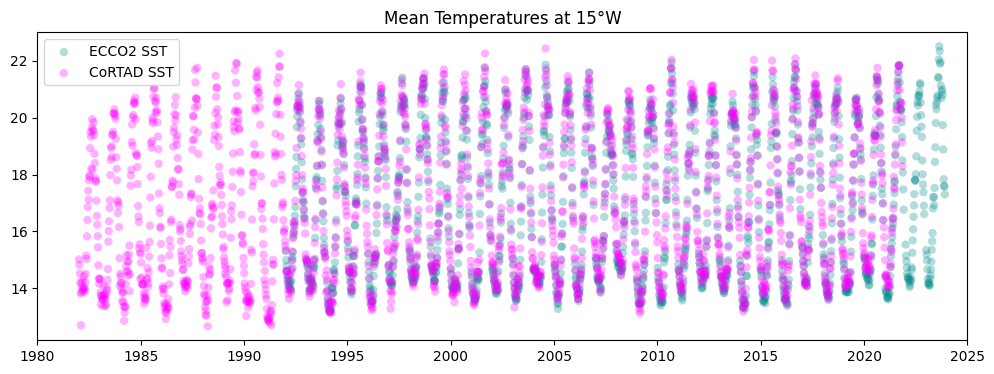

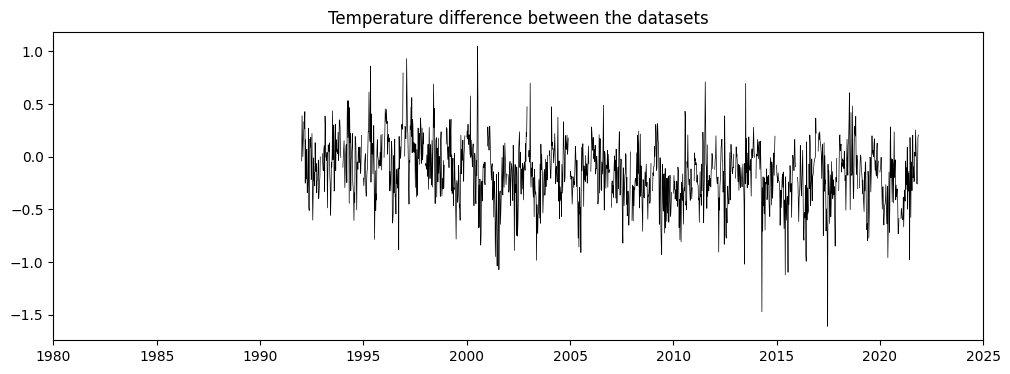

In [62]:
fig = plt.figure(figsize = (12,4))
plt.scatter(ECCO2_SST.time, ECCO2_SST.SST_mean, color = 'darkcyan', alpha = 0.3, edgecolors = 'none', label = 'ECCO2 SST')
plt.scatter(UI_SST.time, UI_SST.Toff15W_mean, color = 'magenta', alpha = 0.3, edgecolors = 'none', label = 'CoRTAD SST')
plt.xlim(dt.date(1980,1,1), dt.date(2025,1,1))
plt.title('Mean Temperatures at 15°W')
plt.legend()

## difference between the two 
fig = plt.figure(figsize = (12,4))
diff_time = ECCO2_SST.time.where(ECCO2_SST.time == UI_SST.time, drop = True)
diff_T = ECCO2_SST.SST_mean.where(ECCO2_SST.time == UI_SST.time, drop = True) - UI_SST.Toff15W_mean.where(ECCO2_SST.time == UI_SST.time, drop = True)
plt.xlim(dt.date(1980,1,1), dt.date(2025,1,1))
plt.plot(diff_time, diff_T, color = 'k', linewidth = 0.5) #, edgecolors = 'none')
plt.title('Temperature difference between the datasets')

In [58]:
dt.year(2021)

AttributeError: module 'datetime' has no attribute 'year'